In [3]:
import numpy as np
import definitionsFits as defs
import matplotlib.pyplot as plt
import cmath
import os
import scipy.special as spcl
import pylab as plb
import twoPhotonDipole as dipole
import defsDipole
import scipy.optimize as sopt

%matplotlib inline


(1.26486610172+0j)
(0.0250573810079+0j)
(0.399118108981+1.42372768654e-16j)
(-0.252536582211-5.41536287024e-18j)


In [4]:
omega = np.arange(0.5, 1.2, 0.005)
m = range(1, 3)
E_0 = -1.1591
E_m = [-0.8502, -0.3278, -0.1665]
alpha = 0.006
T = 3/0.02419

Path = '/Users/cgoldsmith/Desktop/text_files_data'
    # os.chdir(Path)
omega_dip=np.zeros(2000)
i=0
with open(Path+'/omega4dip.txt') as infile:
    for line in infile:
        omega_dip[i]=(line.split()[0])
        i=i+1

dip_1=np.zeros(np.size(omega_dip))
i=0
with open(Path + '/alpha1_3fs.txt') as infile:
    for line in infile:
        dip_1[i]=(line.split()[0])
        i=i+1    

dip_3=np.zeros(np.size(omega_dip))
i=0
with open(Path + '/alpha3_3fs.txt') as infile:
    for line in infile:
        dip_3[i]=(line.split()[0])
        i=i+1       

delta_m = np.zeros(np.size(E_m))
for j in m:
    delta_m[j] = E_m[j] - E_0
    
Path = '/Users/cgoldsmith/Desktop/text_files_data'
os.chdir(Path)
data = np.loadtxt('TDSE_3fs.txt')
x = data[:, 0]
y = data[:, 4]


In [5]:
Path = '/Users/cgoldsmith/repos/delayFitting/Data/eigenstates/wavefxCalc__2'
os.chdir(Path)

m = range(1, 3)
E_0 = -1.1591
E_m = [-0.8502, -0.3278, -0.1665]

omegaAU = 1.15

wfsize = 0


with open('wf1D0.txt') as infile:
	for line in infile:
		row = (line.split())[0]
		wfsize = wfsize + 1

z = np.zeros(wfsize)
wf0 = np.zeros(wfsize)
wf1 = np.zeros(wfsize)
wf2 = np.zeros(wfsize)
wf3 = np.zeros(wfsize)
planeWaveTest = np.zeros(wfsize, 'complex')
zRealPlaneWave = np.zeros(wfsize)
zImagPlaneWave = np.zeros(wfsize)

i = 0
with open('wf1D0.txt') as infile:
	for line in infile:
		z[i] = (line.split())[0]
		wf0[i] = (line.split())[1]
		i = i + 1

i = 0
with open('wf1D1.txt') as infile:
	for line in infile:
		wf1[i] = (line.split())[1]
		i = i + 1

i = 0
with open('wf1D2.txt') as infile:
	for line in infile:
		wf2[i] = (line.split())[1]
		i = i + 1

i = 0
with open('wf1D3.txt') as infile:
	for line in infile:
		wf3[i] = (line.split())[1]
		i = i + 1


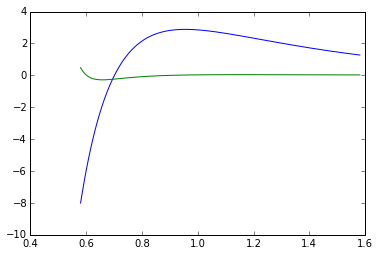

In [6]:
plt.plot(omega_dip, dip_1, omega_dip, dip_3)

In [7]:
oneVsOmega = np.zeros(np.size(omega_dip), 'complex')
threeVsOmega = np.zeros(np.size(omega_dip), 'complex')
i = 0
for i in range(0, np.size(omega_dip)):
    oneVsOmega[i] = dipole.constructDipole(omega_dip[i], defsDipole.wf1)
    threeVsOmega[i] = dipole.constructDipole(omega_dip[i], defsDipole.wf3)

In [8]:
print dipole.constructDipole(omega_dip[100], defsDipole.wf1)
print dipole.constructDipole(omega_dip[100], wf1)

(7.56259799842-8.83143496554e-17j)
(0.149817359481-1.74953404537e-18j)


In [9]:
print dipole.constructBound(wf1)
print dipole.constructBound(defsDipole.wf1)

(0.0250573810079+0j)
(1.26486610172+0j)


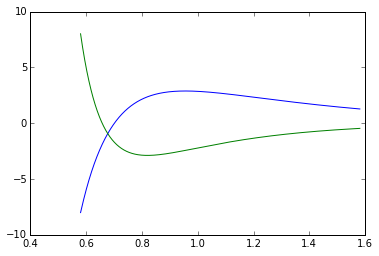

In [58]:
plt.plot(omega_dip, dip_1, omega_dip, np.real(alpha1f))

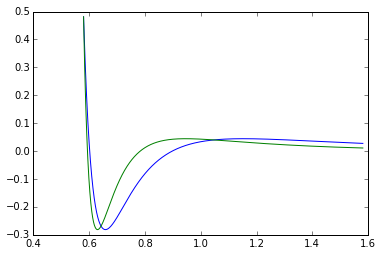

In [32]:
plt.plot(omega_dip, dip_3, omega_dip, np.real(alpha3f))

In [ ]:
defsDipole.getk(1.0, defsDipole.E_0)

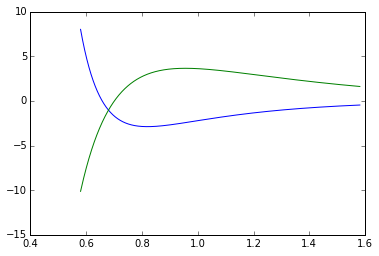

In [25]:
plt.plot(omega_dip, np.real(alpha1f), omega_dip, np.real(oneVsOmega))

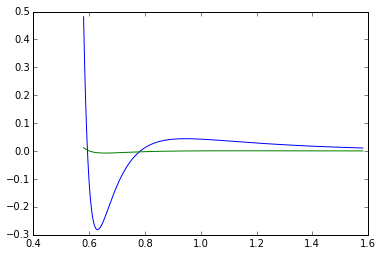

In [59]:
plt.plot(omega_dip, np.real(alpha3f), omega_dip, np.real(threeVsOmega))

In [11]:
E_0 = -1.1591
E_m = [-0.8502, -0.3278, -0.1665]
T = 3/0.02419
delta_m = np.zeros(np.size(E_m))
for j in (0, 1, 2):
    delta_m[j] = E_m[j] - E_0
optSize = np.size(omega_dip)
alpha1f = np.zeros(optSize, 'complex')
alpha3f = np.zeros(optSize, 'complex')
realFactor = np.zeros(optSize, 'complex')
imagFactor = np.zeros(optSize, 'complex')
T = 3 / 0.02419

In [12]:
for i in range(0, np.size(omega_dip)):
    alpha1f[i] = dipole.constructDipole(omega_dip[i], defsDipole.wf1)
    alpha3f[i] = dipole.constructDipole(omega_dip[i], defsDipole.wf3)
# alpha1f = dip_1
# alpha3f = dip_3

In [13]:
# oneVsOmega = np.zeros(np.size(omega_dip), 'complex')
# threeVsOmega = np.zeros(np.size(omega_dip), 'complex')
# i = 0
# for omega in omega_dip:
#     oneVsOmega[i] = dipole.constructDipole(omega, wf1)
#     threeVsOmega[i] = dipole.constructDipole(omega, wf3)
#     i = i + 1

oneVsOmega = np.zeros(np.size(omega_dip), 'complex')
threeVsOmega = np.zeros(np.size(omega_dip), 'complex')
for i in range(0, np.size(omega_dip)):
    oneVsOmega[i] = dip_1[i] * dipole.constructBound(defsDipole.wf1)
    threeVsOmega[i] = dip_3[i] * dipole.constructBound(defsDipole.wf3)
#     oneVsOmega[i] = dipole.constructDipole(omega_dip[i], wf1)
#     threeVsOmega[i] = dipole.constructDipole(omega_dip[i], wf3)
    
    

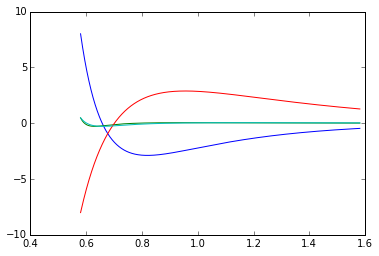

In [60]:
plt.plot(omega_dip, np.real(alpha1f), omega_dip, np.real(alpha3f), omega_dip, dip_1, omega_dip, dip_3)

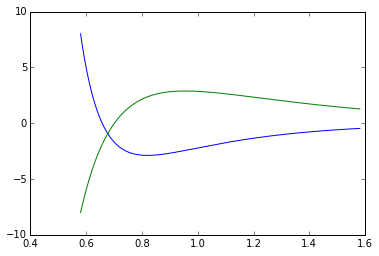

In [61]:
plt.plot(omega_dip, np.real(alpha1f), omega_dip, dip_1)

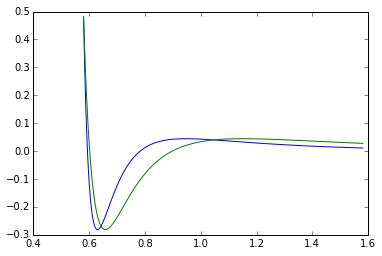

In [62]:
plt.plot(omega_dip, np.real(alpha3f), omega_dip, dip_3)

In [63]:
def cheat(omegaD, free):
#     omega = omega_dip
    dawsArg1st = T*(delta_m[0] - omegaD)
    dawsArg3rd = T*(delta_m[1] - omegaD)
    realFactor = np.real((alpha1f * np.exp(-(1/free)*np.power(dawsArg1st,2.0)))\
            + (alpha3f * np.exp(-(1/free)*np.power(dawsArg3rd, 2.0))))
    imagFactor = (alpha1f * ((-2 * cmath.sqrt(-1))\
            / (np.sqrt(np.pi))) * spcl.dawsn((1/np.sqrt(free))*dawsArg1st))\
                + (alpha3f * ((-2 * cmath.sqrt(-1))\
                    / (np.sqrt(np.pi))) * spcl.dawsn((1/np.sqrt(free))*dawsArg3rd))
    dE = np.gradient(omegaD)
    dIm = np.gradient(imagFactor, dE)
    dRe = np.gradient(realFactor, dE)
    derivFactor = (realFactor * dIm) - (np.imag(imagFactor * dRe))
    zSquared = realFactor*realFactor + np.imag(imagFactor)*np.imag(imagFactor)
    ans =  (realFactor * np.imag(dIm) - np.imag(imagFactor * dRe)) / zSquared
    return ans

In [64]:
def cheatFacReal(omegaD, free):
    dawsArg1st = T*(delta_m[0] - omegaD)
    dawsArg3rd = T*(delta_m[1] - omegaD)
    realFactor = np.real((alpha1f * np.exp(-(1/free)*np.power(dawsArg1st,2.0)))\
            + (alpha3f * np.exp(-(1/free)*np.power(dawsArg3rd, 2.0))))
    return realFactor

def cheatFacImag(omegaD, free):
    imagFactor = (alpha1f * ((-2 * cmath.sqrt(-1))\
            / (np.sqrt(np.pi))) * spcl.dawsn((1/np.sqrt(free))*dawsArg1st))\
                + (alpha3f * ((-2 * cmath.sqrt(-1))\
                    / (np.sqrt(np.pi))) * spcl.dawsn((1/np.sqrt(free))*dawsArg3rd))
    return imagFactor

In [65]:
plt.plot(omega_dip, cheatFacReal(omega_dip, 42.2), omega_dip, np.imag(cheatFacImag(omega_dip, 42.2)))

NameError: global name 'dawsArg1st' is not defined

In [66]:
plt.plot(omega_dip, cheatFacReal(omega_dip, 42.2)*np.gradient(np.imag(cheatFacImag(omega_dip, 42.2)), np.gradient(omega_dip)))

NameError: global name 'dawsArg1st' is not defined

In [67]:
plt.plot(omega_dip, np.imag(cheatFacImag(omega_dip, 42.2)))

NameError: global name 'dawsArg1st' is not defined

In [68]:
plt.plot(omega_dip, (cheatFacReal(omega_dip, 42.2)*\
                     cheatFacReal(omega_dip, 42.2) + np.imag(cheatFacImag(omega_dip, 42.2))\
                    * np.imag(cheatFacImag(omega_dip, 42.2))))
plb.xlim([0.6, 1.2])
plb.xlabel('central frequency (a.u.)')
plb.ylabel('z square')

NameError: global name 'dawsArg1st' is not defined

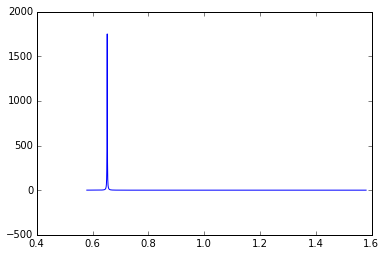

In [69]:
plt.plot(omega_dip, np.real(cheat(omega_dip, 10)))

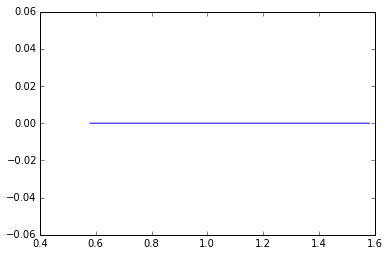

In [70]:
plt.plot(omega_dip, np.real(realFactor))

In [71]:
imagFactor = (alpha1f * ((-2 * cmath.sqrt(-1))\
            / (np.sqrt(np.pi))) * spcl.dawsn((1/np.sqrt(free))*dawsArg1st))\
                + (alpha3f * ((-2 * cmath.sqrt(-1))\
                    / (np.sqrt(np.pi))) * spcl.dawsn((1/np.sqrt(free))*dawsArg3rd))


NameError: name 'free' is not defined

In [72]:
 realFactor = np.real((alpha1f * np.exp(-(1/free)*np.power(dawsArg1st,2.0)))\
                + (alpha3f * np.exp(-(1/np.sqrt(free))*np.power(dawsArg3rd, 2.0))))

NameError: name 'free' is not defined

(0.82, 0.84)

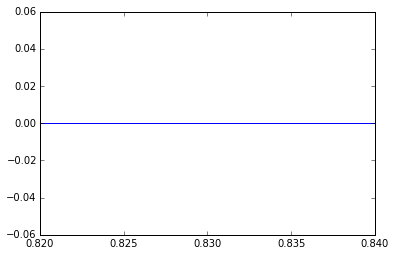

In [73]:
plt.plot(omega_dip, np.imag(imagFactor))
plb.xlim([0.82, 0.84])

(0.7, 0.9)

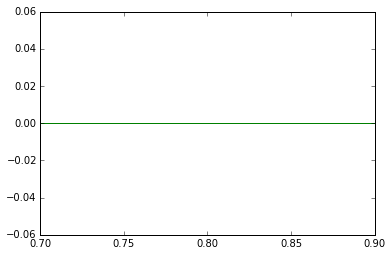

In [74]:
plt.plot(omega_dip, np.imag(imagFactor), omega_dip, realFactor)#, omega_dip, ratio)
plb.xlim([0.7, 0.9])


In [75]:
dE = np.gradient(omega_dip)
dIm = np.gradient(imagFactor, dE)
dRe = np.gradient(realFactor, dE)

In [ ]:
plt.plot(omega_dip, np.imag(imagFactor), omega_dip, np.imag(dIm))

In [ ]:
plt.plot(omega_dip, realFactor, omega_dip, dRe)

In [ ]:
derivFactor = (realFactor * dIm) - (np.imag(imagFactor * dRe))

In [ ]:
plt.plot(omega_dip, derivFactor)

In [ ]:
zSquared = realFactor*realFactor + np.imag(imagFactor)*np.imag(imagFactor)

In [ ]:
plt.plot(omega_dip, zSquared)

In [ ]:
plt.plot(omega_dip, np.imag(imagFactor*dRe))

In [ ]:
plt.plot(omega_dip, np.imag(realFactor*dIm))

In [ ]:
plt.plot(omega_dip, (realFactor*np.imag(dIm) - np.imag(imagFactor*dRe))/zSquared)
plb.xlim([0.65, 0.70])


In [ ]:
plt.plot(omega_dip, realFactor*np.imag(dIm))

In [ ]:
plt.plot(omega_dip, cheat(omega_dip, 95), x, y, 'bo')
plb.ylim([-10, 10])

In [ ]:
test1 = fitDipoleFactors(omega_dip, 700)


In [ ]:
plt.plot(x, y, omega_dip, test1)
plb.ylim([-10, 10])

In [ ]:
def delay(omegaD, free):
    E_0 = -1.1591
    E_m = [-0.8502, -0.3278, -0.1665]
    T = 3/0.02419
    delta_m = np.zeros(np.size(E_m))
    for j in (0, 1, 2):
        delta_m[j] = E_m[j] - E_0
    optSize = np.size(omegaD)
    alpha1f = np.zeros(optSize, 'complex')
    alpha3f = np.zeros(optSize, 'complex')
    realFactor = np.zeros(optSize, 'complex')
    imagFactor = np.zeros(optSize, 'complex')
    T = 3 / 0.02419

    for i in range(0, np.size(defs.omegaD)-1):
        alpha1f[i] = dipole.constructDipole(omegaD[i], defsDipole.wf1)
        alpha3f[i] = dipole.constructDipole(omegaD[i], defsDipole.wf3)

    dawsArg1st = T*(delta_m[0] - omegaD)
    dawsArg3rd = T*(delta_m[1] - omegaD)
    realFactor = np.real((alpha1f * np.exp(-(1/free)*np.power(dawsArg1st,2.0)))\
                + (alpha3f * np.exp(-(1/free)*np.power(dawsArg3rd, 2.0))))

    imagFactor = (alpha1f * ((-2 * cmath.sqrt(-1))\
                / (np.sqrt(np.pi))) * spcl.dawsn(-(1/np.sqrt(free))*dawsArg1st))\
                    + (alpha3f * ((-2 * cmath.sqrt(-1))\
                        / (np.sqrt(np.pi))) * spcl.dawsn(-(1/np.sqrt(free))*dawsArg3rd))

    dE = np.gradient(omegaD)
    dIm = np.gradient(imagFactor, dE)
    dRe = np.gradient(realFactor, dE)
    derivFactor = (realFactor * dIm) - (np.imag(imagFactor * dRe))
    zSquared = realFactor*realFactor + np.imag(imagFactor)*np.imag(imagFactor)
    ans =  (realFactor * np.imag(dIm) - np.imag(imagFactor * dRe)) / zSquared
    return ans

In [ ]:
test1 = delay(omega_dip, 51)

In [ ]:
plt.plot(omega_dip, test1, 'r-', x, y, 'bo')
plb.ylim([-10, 10])

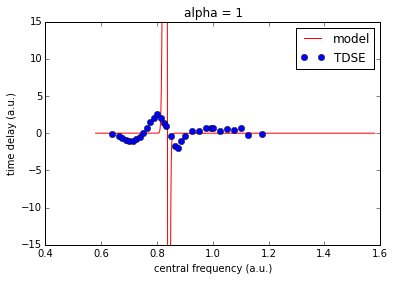

In [21]:
plt.plot(omega_dip, cheat(omega_dip, 1), 'r-', x, y, 'bo')
plb.ylim([-15, 15])
plb.ylabel('time delay (a.u.)')
plb.xlabel('central frequency (a.u.)')
plb.legend(['model', 'TDSE'])
plb.title('alpha = 1')

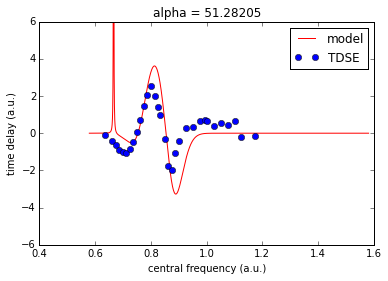

In [50]:
plt.plot(omega_dip, cheat(omega_dip, 1/0.0195), 'r-', x, y, 'bo')
plb.ylim([-6, 6])
plb.ylabel('time delay (a.u.)')
plb.xlabel('central frequency (a.u.)')
plb.legend(['model', 'TDSE'])
plb.title('alpha = 51.28205')

In [37]:
def gaussianPulse(t, E0, cen, alpha, T):
    return (E0) * np.exp(-alpha*(t-cen)**2 /(2*T**2))

In [38]:
tt = np.arange(-400, 400, 0.1)

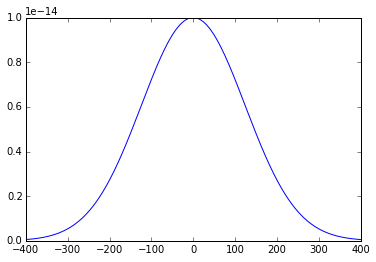

In [39]:
plt.plot(tt, gaussianPulse(tt, 1e-14, 0, 1, 3/0.02419))

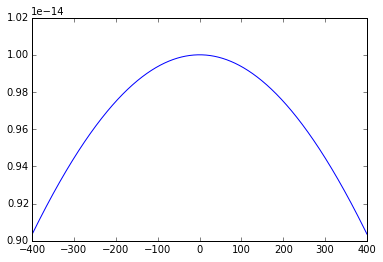

In [40]:
plt.plot(tt, gaussianPulse(tt, 1e-14, 0, 0.0195, 3/0.02419))

In [41]:
def cossqPulse(t, E0, T):
    s = np.zeros(np.size(t))
    i = 0
    for x in t:
        if(x > -T/2 and x < T/2):
            s[i] = (E0 * (np.cos(np.pi*x/T))**2)
        else:
            s[i] = 0
        i = i + 1
    return s

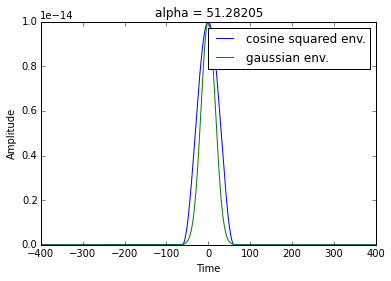

In [42]:
plt.plot(tt, cossqPulse(tt, 1e-14, 3/0.02419))
plt.plot(tt, gaussianPulse(tt, 1e-14, 0, 51.282051282051285, 3/0.02419))
plb.ylabel('Amplitude')
plb.xlabel('Time')
plb.legend(['cosine squared env.', 'gaussian env.'])
plb.title('alpha = 51.28205')

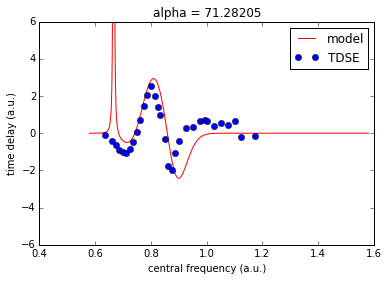

In [52]:
plt.plot(omega_dip, cheat(omega_dip, 71.282051282051285), 'r-', x, y, 'bo')
plb.ylim([-6, 6])
plb.ylabel('time delay (a.u.)')
plb.xlabel('central frequency (a.u.)')
plb.legend(['model', 'TDSE'])
plb.title('alpha = 71.28205')

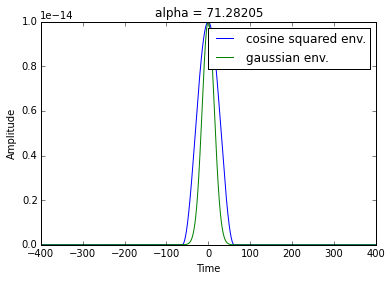

In [51]:
plt.plot(tt, cossqPulse(tt, 1e-14, 3/0.02419))
plt.plot(tt, gaussianPulse(tt, 1e-14, 0, 71.282051282051285, 3/0.02419))
plb.ylabel('Amplitude')
plb.xlabel('Time')
plb.legend(['cosine squared env.', 'gaussian env.'])
plb.title('alpha = 71.28205')

In [ ]:
1/0.0195